In [32]:
import pandas as pd
from antQuant.utils import DataManager

In [33]:
samsungbio = DataManager()
samsungbio_stock = samsungbio.get_daily_ohlcv('207940')

In [36]:
samsungbio_stock.index.get_loc('2016-11-10')

0

In [37]:
samsungbio_stock = samsungbio_stock[samsungbio_stock.index.get_loc('2016-11-10'):]

In [38]:
samsung = pd.read_excel('datalab_samsung.xlsx', skiprows=6)
samsungbio = pd.read_excel('datalab_samsungbio.xlsx',skiprows=6)
hynix = pd.read_excel('datalab_skhynix.xlsx',skiprows=6)
celltrion = pd.read_excel('datalab_celltrion.xlsx',skiprows=6)
hyundai = pd.read_excel('datalab_hyundai.xlsx',skiprows=6)

In [39]:
for df in [samsung, samsungbio, hynix, celltrion, hyundai]:
    df.columns = ['date', 'search']
    df.date = pd.to_datetime(df.date)

In [40]:
samsungbio = samsungbio.set_index('date')

In [41]:
samsungbio = samsungbio.shift(1)

In [42]:
all_set = pd.concat([samsungbio, samsungbio_stock], axis=1)

In [43]:
all_set = all_set.dropna(axis=0)

In [44]:
import math

In [45]:
log_close = []
for i in range(len(all_set.index)):
    a = math.log(all_set['close'][i])
    log_close.append(a)

In [46]:
all_set['log_close']=log_close

In [47]:
all_set['log_close_diff'] = all_set['log_close'].diff()

In [48]:
all_set = all_set[1:]

In [49]:
import matplotlib.pyplot as plt

In [50]:
all_set = pd.DataFrame(all_set)

In [51]:
from sklearn.preprocessing import StandardScaler
stdscaler = StandardScaler()
x_search = all_set[['search']].values.astype(float)
std_search = stdscaler.fit_transform(x_search)

In [52]:
norm_log_close_diff = all_set[['log_close_diff']].values.astype(float)
norm_log_close_diff = stdscaler.fit_transform(norm_log_close_diff)

In [53]:
all_set['std_search'] = std_search
all_set['norm_log_close_diff'] = norm_log_close_diff

In [54]:
all_set['std_search'].plot()
all_set['norm_log_close_diff'].plot()
plt.legend(['std_search', 'norm_log_close_diff'])

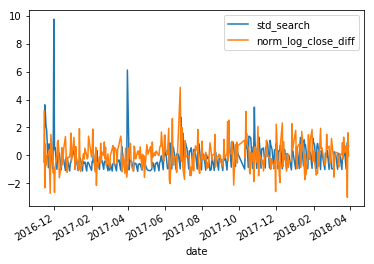

In [55]:
plt.show()

In [56]:
from scipy.stats import pearsonr
pearsonr(all_set['std_search'], all_set['norm_log_close_diff'])

(-0.16062870481398484, 0.0030620828254033163)

In [57]:
all_set.corr()

,search,open,high,low,close,volume,adj_ratio,log_close,log_close_diff,std_search,norm_log_close_diff
search,1.000000,0.194242,0.193765,0.183328,0.184681,0.477026,NaN,0.185902,-0.160629,1.000000,-0.160629
open,0.194242,1.000000,0.998532,0.999043,0.997532,-0.092883,NaN,0.987837,-0.005117,0.194242,-0.005117
high,0.193765,0.998532,1.000000,0.998620,0.999073,-0.075151,NaN,0.989462,0.032154,0.193765,0.032154
low,0.183328,0.999043,0.998620,1.000000,0.998968,-0.104204,NaN,0.988961,0.021761,0.183328,0.021761
close,0.184681,0.997532,0.999073,0.998968,1.000000,-0.089333,NaN,0.990091,0.054780,0.184681,0.054780
volume,0.477026,-0.092883,-0.075151,-0.104204,-0.089333,1.000000,NaN,-0.085867,0.076995,0.477026,0.076995
adj_ratio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
log_close,0.185902,0.987837,0.989462,0.988961,0.990091,-0.085867,NaN,1.000000,0.059937,0.185902,0.059937
log_close_diff,-0.160629,-0.005117,0.032154,0.021761,0.054780,0.076995,NaN,0.059937,1.000000,-0.160629,1.000000
std_search,1.000000,0.194242,0.193765,0.183328,0.184681,0.477026,NaN,0.185902,-0.160629,1.000000,-0.160629
